### 1.10

In [5]:
# Slot machine reward distribution
rewards = [0, 5, 10, 20]  # Dollar amounts
probabilities = [0.35, 0.3, 0.25, 0.1]  # Probabilities

#Second slot machine with new reward distribution
rewards2 = [0, 5, 10, 20]  # Dollar
probabilities2 = [0.3, 0.35, 0.3, 0.05]  # New Probabilities

# Calculate the distribution of the sum
sum_distribution = {}
for r_reward, r_prob in zip(rewards, probabilities):
    for s_reward, s_prob in zip(rewards2, probabilities2):
        total = r_reward + s_reward
        prob = r_prob * s_prob
        if total not in sum_distribution:
            sum_distribution[total] = 0
        sum_distribution[total] += prob

# Sort by total reward
sorted_sum = sorted(sum_distribution.items())
sum_totals = [x[0] for x in sorted_sum]
sum_probs  = [x[1] for x in sorted_sum]

print("Distribution of the Sum of Rewards P(R+S):")
print(f"{'Sum of Rewards':<18} {'Probability':<15}")
print("-" * 35)
for total, prob in sorted_sum:
    print(f"${total:<17} {prob:.4f} ({prob:.2%})")



Distribution of the Sum of Rewards P(R+S):
Sum of Rewards     Probability    
-----------------------------------
$0                 0.1050 (10.50%)
$5                 0.2125 (21.25%)
$10                0.2850 (28.50%)
$15                0.1775 (17.75%)
$20                0.1225 (12.25%)
$25                0.0500 (5.00%)
$30                0.0425 (4.25%)
$40                0.0050 (0.50%)


### 1.14

Since both slot machines are independent, the probability of the sum of both machines being more than 20 is:

P(R+S > 20 | R = 10) = P(S > 10) = P(S = 20) = 0.05

### 2.1

![Photo description](../../photos/IMG_2849.jpeg)
The derivation of bayes identity from the two probability laws presented in class. You simply substitute the RHS part of eq(2) into the RHS of eq(1) which yields bayes formula. The other directions also follow from substitution. 

### 3.4
After including the additional ten samples, the expected value becomes 6.5. This value is much closer to the "real" expectation of machine R (6) than to that of machine S (5.75). We also observe two occurrences of a reward of 20, which has a significantly lower probability under machine S than under machine R. These observations therefore suggest that the player was most likely using machine R.

However, the empirical standard deviation is 6.15, indicating a high level of variability in the observed rewards. Due to this large variance and the relatively small sample size, the conclusion remains uncertain and should be interpreted with caution.

### 3.5
Since believe that the player is using machine R, the expectation for the 21st play is that the reward will follow the same distribution as machine R. In that case, the expected reward is 6.

However, the high standard deviation makes this expectation uncertain and limits the strength of the conclusion.

### 4.2

States: we can map the surfaces that needs to be cleaned as an x,y grid where each cell represents a part of the room. The state would then be the current position of the robot on this grid and which cells have been cleaned.

Actions: The actions would be the possible movements the robot can make (up, down, left, right) and an action to vacuum the current cell.

Rewards: The robot would recieve a positive reward for vacuuming a cell that is dirty and a small negative reward for each movement to encourage efficiency. As it is a house cleaning robot, we can also impose a negative reward for crashing into obstacles or walls.

### 4.6
The reason for the competing robot crashing more, but performing better in other ways, can be that the competing firm has prioritized performance (time, efficient sweeping) over safety (avoiding crashes). 
It could for example be that the competing robot drives faster, which increases the chance of crashing, but also allows it to finish the task quicker.
For sure the competing robot has a less negative reward for crashing, which leads it to adapt policies that crash more often.

### 4.7
From a technical perspective, deploying the robot on factory floors instead of in homes is risky due to the significant difference between the training and deployment environments. Factory floors typically involve different conditions, and requirements. This may cause a policy trained in homes to generalize poorly. This shift could lead to reduced performance or unsafe behaviour. It would therefore be important to retrain the robot in factory like environments. It is also likely that the competing robot will be better than ours in a factory aswell, because factories usually have larger spaces, and less obstacles.

### 5.1

We find the choice to use RL in this scenario inappropriate as it would face some ethical and practical challenges.
Firstly, RL typically requires a large number of interactions with the environment to learn an effective policy. This is ethically problematic as it would risk the first applicants to not be considered fairly, as the system would be learning and making mistakes during this period.

Secondly, the recruitment process often involves subjective judgments and qualitative factors that are difficult to represent and incorporate into a reward function. E.g. it would be difficult to design well-structured reward functions that capture all relevant aspects of a candidate's potential. One could argue that you can create some kind of efficiency measure, but the data collection for this would likely take a long time and be very noisy.



### 6.1 

MABs
Giving three different vaccines to the same population and gradually estimating which vaccine is the most efficient based on a relevant reward measure. To get these estimates you would need to use exploration vs exploitation strategies to make sure you get good estimates of each vaccine's efficiency. A good strategy would ensure that you gradually would shift towards giving the most efficient vaccine to the majority of the population and thus maximize your goal.

This MAB approach can be more sensible than a RCT (randomized control trial) as it is adaptive and will gradually give more people the best vaccine. This can be crucial in for example a pandemic situation where you want to maximize the efficiency of the vaccine rollout as quickly as possible and not wait for the results of a full RCT before changing strategy.


## 7.1

![Photo description](../../photos/IMG_2848.jpeg)
The probabilities of underestimating the expected rewards by u= : 0.01, 0.1, 0.5

### 8.1

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../../src')
from bandit import Bandits_one

In [7]:
def epsilon_greedy(MAB,time,epsilon):
    
    expected_rewards = np.zeros(MAB.k)   # estimated rewards|ai to zero
    action_count = np.zeros(MAB.k,dtype=int)   # action_counts initialized to zero


    actions = np.zeros(time, dtype=int)
    rewards = np.zeros(time)

    for t in range(time):
        # sample e from Uniform[0,1]
        if np.random.rand() < epsilon:
            action = np.random.randint(MAB.k) # random action
        else:
            action = np.argmax(expected_rewards) # greedy action
    
        # take action and observe reward
        observation,reward,terminated,truncated,info = MAB.step(action)

        # update counters and estimates
        action_count[action] += 1
        expected_rewards[action] += (reward - expected_rewards[action]) / action_count[action]
    
        actions[t] = action
        rewards[t] = reward

    return expected_rewards, action_count, actions, rewards


In [8]:
def decaying_epsilon_greedy(MAB,time,epsilon,alpha):
    
    expected_rewards = np.zeros(MAB.k)   # estimated rewards|ai to zero
    action_count = np.zeros(MAB.k, dtype=int)  # action_counts initialized to zero

    actions = np.zeros(time, dtype=int)
    rewards = np.zeros(time)

    for t in range(time):
        # sample e from Uniform[0,1]
        if np.random.rand() < epsilon:
            action = np.random.randint(MAB.k) # random action
        else:
            action = np.argmax(expected_rewards) # greedy action
    
        # take action and observe reward

        observation,reward,terminated,truncated,info = MAB.step(action)

        # update counters and estimates
        action_count[action] += 1
        expected_rewards[action] += (reward - expected_rewards[action]) / action_count[action]

        actions[t] = action
        rewards[t] = reward

        # decay epsilon
        epsilon = alpha * epsilon

    return expected_rewards, action_count, actions, rewards

In [9]:
def UCB(MAB,time,c):
    expected_rewards = np.zeros(MAB.k)   # estimated rewards|ai to zero
    action_count = np.zeros(MAB.k, dtype=int)  # action_counts initialized to zero

    actions = np.zeros(time, dtype=int)
    rewards = np.zeros(time)

    for t in range(1, time + 1):
        # evaluate UCB for all actions
        upper_bound = np.zeros(MAB.k)
        for i in range(MAB.k):
            if action_count[i] == 0:
                upper_bound[i] = np.inf   # force exploration
            else:
                upper_bound[i] = np.sqrt(np.log(t) / action_count[i])

        # select action that maximizes Q + c * U
        action = np.argmax(expected_rewards + c * upper_bound)

        # take action and observe reward
        observation, reward, terminated, truncated, info = MAB.step(action)

        # update counters and estimates
        action_count[action] += 1
        expected_rewards[action] += (reward - expected_rewards[action]) / action_count[action]


        actions[t - 1] = action
        rewards[t - 1] = reward
    return expected_rewards, action_count, actions, rewards


### 8.4

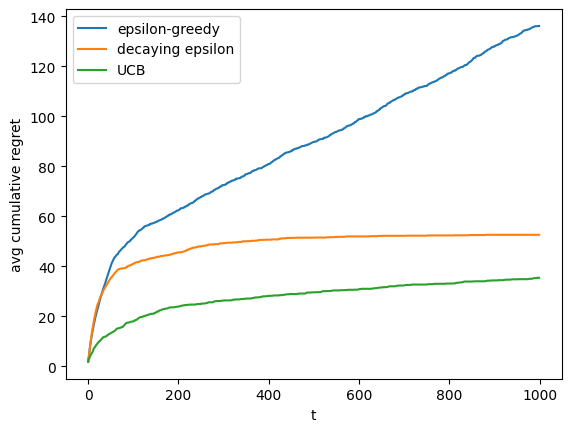

In [15]:
REPEATS = 20
T = 1000

def cummulative_regret(MAB, actions):
    return np.cumsum(MAB.get_optimal_expected_reward() - MAB.means[actions])

reg_eps = np.zeros((REPEATS, T))
reg_decay = np.zeros((REPEATS, T))
reg_ucb = np.zeros((REPEATS, T))

for r in range(REPEATS):
    MAB = Bandits_one(random_state=r) #fjerna MAB fra alle radan, la til random state 
    expected_rewards, action_count, actions, rewards = epsilon_greedy(MAB, T, epsilon=0.1)
    reg_eps[r] = cummulative_regret(MAB, actions)
                                                                                #retta opp epsilon = 0.1, stod egnt. 1.0
    expected_rewards, action_count, actions, rewards = decaying_epsilon_greedy(MAB, T, epsilon=0.1, alpha=0.995)
    reg_decay[r] = cummulative_regret(MAB, actions)

    expected_rewards, action_count, actions, rewards= UCB(MAB, T, c=2.0)
    reg_ucb[r] = cummulative_regret(MAB, actions)

plt.plot(reg_eps.mean(axis=0), label="epsilon-greedy")
plt.plot(reg_decay.mean(axis=0), label="decaying epsilon")
plt.plot(reg_ucb.mean(axis=0), label="UCB")
plt.xlabel("t")
plt.ylabel("avg cumulative regret")
plt.legend()
plt.show()


We see in this plot of the cumulative regrets for the three algorithms that UCB shows signs of converging towards a lower regret compared to both epsilon-greedy and decaying epsilon-greedy. We see that decaying epsilon-greedy also shows asymptotic behaviour, while as expected epsilon-greedy does not. This is because epsilon-greedy continues to explore at a constant rate, while the other two algorithms reduce exploration over time. This matches the asymptotic behaviour presented in class.

To see this we implemented the pseudocode for the three algorithms presented in class, and plotted the average cummulative regret for 1000 periods.

### 8.6
The new problem with four medicines can be solved using the same algorithms by simply increasing the number of arms from three to four.It is not necessary to restart completely from scratch, the estimates for the original medicines A,B,C can be reused, while the new medicine D can be initialized with zero counts and estimates. However, some additional exploration is required to properly evaluate the new arm. 

For epsilon-greedy, the algorithm explores all arms with probability epsilon, so the new arm is guaranteed to be explored over time. For UCB, the new arm will initially have a high uncertainty, leading to a high upper confidence bound, which encourages exploration of the new arm. As more data is collected on the new arm, its estimates will improve and it will be treated similarly to the other arms.

For decaying epsilon-greedy, the new arm will not be selected if the epsilon value has decayed too much. To fix this, we can boost the epsilon value temporarily to ensure sufficient exploration of the new arm.

### 8.9

Bandits_one() is easier to solve than Bandits_three() because the difference between the expected rewards of the arms is larger. This leads to lower regret and faster identification of the optimal arm, while Bandits_three() requires more exploration due to smaller reward differences.

### 8.12

No, the optimal action is not the same for all patients. In Bandits_four(), the optimal medicine depends on the gene value G. When 𝐺=0, we see that medicine Z has the highest expected reward, while for 𝐺=1 medicine X yields the highest expected reward. This differs from Bandits_three(), where we do not take into account the different effectiveness on the different genes. Thus, the optimal arm in bandit_three() is always medicine with index 2. The problem in Bandits_four() is therefore a contextual bandit problem, where the optimal policy depends on observed patient information.

### 8.13

From 8.11 we know that 

Expected rewards given G=0 (X,Y,Z): [1.  2.  2.2]

Expected rewards given G=1 (X,Y,Z): [3.  1.  2.2]


Since the response of medicine X to the gene expression is linear, the expected reward for gene value 𝐺=0.5 can be estimated by linear interpolation between the expected rewards at 𝐺=0 and G=1.
As the expected reward of X is 1 when G=0 and 3 when G=1, the estimated expected reward at G=0.5 is 2.